In [7]:
import utils
grader = utils.Grader()

In [8]:
import os
import scipy
from scipy import io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('punkt')
from nltk import word_tokenize
stemmmer = nltk.PorterStemmer()

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Dataset  1

In [9]:
data1 = io.loadmat("ex6data1.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [10]:
X1 = data1["X"]
XX1 = np.c_[np.ones((X1.shape[0],1)), X1]
Y1 = data1["y"]

In [11]:
def plotData(x,y):
    pos = x[y.ravel() == 1]
    neg = x[y.ravel() == 0]
    plt.scatter(pos[:,0], pos[:,1], marker= "+", c="k", label="pos")
    plt.scatter(neg[:,0], neg[:,1], marker= "o", c="y", label = "neg")
    plt.legend()

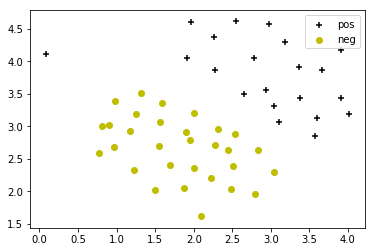

In [12]:
plotData(X1,Y1)

### Support Vector Machine

In [13]:
#Ploting Decision boundry and support vectors
def visualizeBoundaryLinear(model, x, y, h=.02, pad=.25):
    m,n = x.shape
    x1_min, x1_max = min(x[:,0])-pad, max(x[:,0])+pad
    x2_min, x2_max = min(x[:,1])-pad, max(x[:,1])+pad
    x1,x2 = np.meshgrid(np.arange(x1_min,x1_max, h),np.arange(x2_min,x2_max, h))
    #prediction from model
    z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    z = np.reshape(z, x1.shape)
    plt.contourf(x1,x2,z, cmap=plt.cm.Paired, alpha=0.2)
    plotData(x, y)
    
    #plot support vectors of model
    sv = model.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='r', marker='|', s=100, linewidths='1')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    print("Number of support Vectors (shown in red color) are:", len(sv))

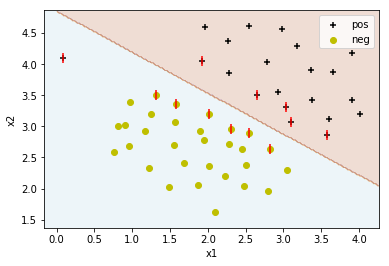

Number of support Vectors (shown in red color) are: 12


In [14]:
# SVM train is inbuild in python
#When C is small (C = 1) 
model = SVC(C = 1, kernel="linear", tol=1e-3)
model.fit(X1, Y1)
#Decision Boundry 
visualizeBoundaryLinear(model, X1, Y1)

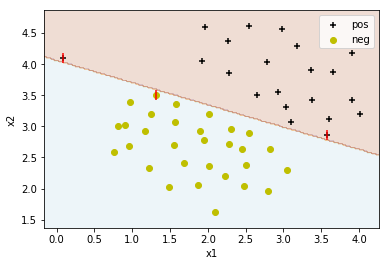

Number of support Vectors (shown in red color) are: 3


In [15]:
#When C is Large (C = 100) 
model = SVC(C = 100, kernel="linear", tol=1e-3)
model.fit(X1, Y1) 
visualizeBoundaryLinear(model, X1, Y1)

### SVM with Gaussian Kernels

In [16]:
# X is our example set , l is landmark which is equal to x(i)
def gaussianKernel(x,l,sigma):
    #x and l are column vectors with same size so;
    v = (x-l).T.dot(x-l)    #similar to np.square(np.mod(x(i)-l(j)) in loop
    return(np.exp(-v/(2*np.square(sigma))))

In [17]:
#Check gaussian kernel at a given values
x1 = np.array([1, 2, 1])
landmarks = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, landmarks, sigma)
sim

0.32465246735834974

#### Dataset 2

In [18]:
data2 = io.loadmat("ex6data2.mat")
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [19]:
X2 = data2["X"]
XX2 = np.c_[np.ones((X2.shape[0],1)), X2]
Y2  = data2["y"]

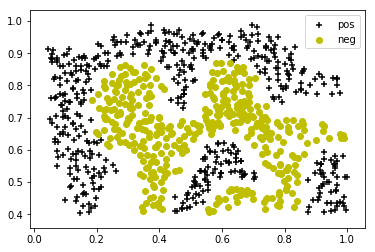

In [20]:
plotData(X2, Y2)

#### Looking at the above figure we can see that linear decision boundry can not seprate the positive and negative examples, So using Gaussian Kernel with SVM can learn non linearity and perform a no linear Decision boundry for this type of dataset

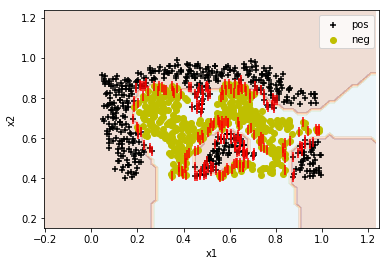

Number of support Vectors (shown in red color) are: 219


In [21]:
#gamma is (1/2*np.square(sigma)) here # rbf is gaussian kernel in python
model = SVC(C=100, kernel="rbf", gamma=6)
model.fit(X2, Y2)
visualizeBoundaryLinear(model, X2, Y2)

#### Dataset 3

In [22]:
data3 = io.loadmat("ex6data3.mat")
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

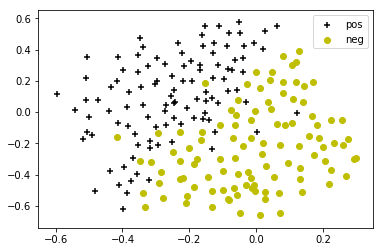

In [23]:
X3 = data3["X"]
XX3 = np.c_[np.ones((X3.shape[0],1)), X3]
Y3 = data3["y"]

Xval = data3["Xval"]
XXval = np.c_[np.ones((Xval.shape[0],1)), Xval]
Yval = data3["yval"]

#Plotting data set 3
plotData(X3, Y3)

In [24]:
#vals is a list of all permutation combination values of C and sigma
def dataset3Params(x,y,xval,yval, vals):
    c, sigma = np.meshgrid(vals, vals)
    #make a array of 3 columns with c, sigma and accordingly prediction/accuracy from SVM 
    f = np.vstack((c.ravel(),sigma.ravel(), np.zeros((c.ravel().shape)))).T   
    for i in range(len(f)):
        C = f[:,0][i]
        gamma = 1/(2*np.square(f[:,1][i]))                        #f[:,1][i] = sigma[i]
        model = SVC(C=C, kernel="rbf", gamma = gamma)
        model.fit(x,y)
        prediction = SVC.predict(model, xval)           #we can also predict it in one line (model.score(xval,yval))
        f[:,2][i] = np.mean((prediction == Yval.ravel()))      #accuracy 
    f1 = f[f[:,2].ravel() == np.max(f[:,2])]
    c, sigma = f1[:,0], f1[:,1]
    return(c,sigma)

In [25]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, sigma = dataset3Params(X3,Y3,Xval,Yval, vals) 
C = C[0]
sigma = sigma[0]
print("optimal values of C and sigma are:\nC =", C , "\nsigma =", sigma)
print("Accuracy on above values of C and sigma is: 96.5%")

optimal values of C and sigma are:
C = 1.0 
sigma = 0.1
Accuracy on above values of C and sigma is: 96.5%


In [26]:
#Train SVM with gaussian kernel using the above computed values of C and sigma
C = C
gamma = 1/(2*np.square(sigma))
model = SVC(C=1, kernel="rbf", gamma =gamma)
model.fit(X3,Y3)
predict = model.score(Xval, Yval)
print("Prediction accuracy on Xval is:", 100*predict, "%")

Prediction accuracy on Xval is: 96.5 %


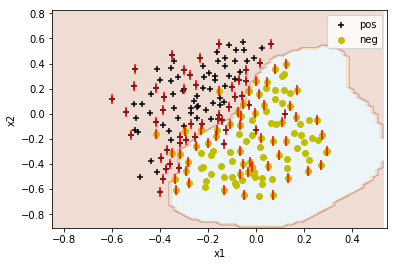

Number of support Vectors (shown in red color) are: 98


In [27]:
visualizeBoundaryLinear(model, X3, Y3)

## Spam Classification

In [28]:
data4 = np.loadtxt("vocab.txt", dtype=str)

In [29]:
#getting vocabulary dictionary with index and values
def getVocabList(path_to_txt):
    data = np.loadtxt("vocab.txt", dtype=str)
    vocab_Dict = {row[1]: int(row[0]) for row in data4}
    return vocab_Dict

In [30]:
import re
#Email content is the one email file (in string format) which contains only email body (no header)
def processEmail(email_content, verbose=True):
    vocab_Dict = getVocabList("vocab.txt")
    word_indices  = []
    
    #lowercase the email content
    email = email_content.lower()  
    
    # if email have header and you want to remove / converting back to str (from list)
#     email = str(email.split("\n>\n")[1:])   

    # Stripping HTML (Removing html tags)
    email = re.compile('<[^<>]+>').sub(' ', email)    
    
    #Normalizing URLS (Replace all urls with "httpaddr")
    email = re.compile("(http|https)://[^\s]*").sub("httpaddr", email)
    
    #Normalizing email addresses (Replace all emailids with "emailaddr")
    email = re.compile("[^\s]+@[^\s]+").sub("emailaddr", email)
    
    #Normalizing Numbers (replaces all integers/numbers with "number")
    email = re.compile("[0-9]+").sub("number", email)
    
    #Normalizing Dollars (Replace All dollar signs ($) with the tex “dollar”)
    email = re.compile("[$]+").sub("dollar", email)
    
   # get rid of any punctuation (replace charracters with space)
    email = re.sub('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', " ", email)
    
    #Tokenization
    email_content = word_tokenize(email) 
    for word in email_content:
        # Remove punctuation and non-alphanumeric characters from a word.
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
        #still there might be a character (so use "if" len(word)<1))
        if len(word)<1:
            continue
        #Stemming(ex. discount, discounts, discounted, discounting all replace with discount)
        word = stemmmer.stem(word)
        try:
            word_indices.append(vocab_Dict[word])
        except:
            pass
    if verbose == True: print("")
    
    return word_indices

In [31]:
with open("emailSample1.txt", mode="r") as f:
    email_content = f.read()
word_indices = processEmail(email_content)

In [32]:
def emailFeatures(word_indices):
    vocab_Dict = getVocabList("vocab.txt")
    n = len(vocab_Dict)
    x = np.zeros((n,1))
    for i in word_indices:
        x[i] = 1
    return(x)

In [33]:
features = emailFeatures(word_indices)

In [34]:
#Spam Training Data
train_data = io.loadmat("spamTrain.mat")
test_data = io.loadmat("spamTest.mat")
X_train = train_data["X"]
Y_train = train_data["y"]
X_test = test_data["Xtest"]
Y_test = test_data["ytest"]

In [39]:
#Train model on spam training data
C = 0.1
model = SVC(C, kernel="linear", tol=1e-3)
model.fit(X_train, Y_train)
train_pred = SVC.predict(model, X_train)  
training_accuracy = np.mean((train_pred == Y_train.ravel())*100) 
print("Training Accuracy of Spam classification is:", training_accuracy, "%\n")

test_pred = SVC.predict(model, X_test)
test_accuracy = np.mean((test_pred == Y_test.ravel())*100) 
print("Test Accuracy of Spam classification is:", test_accuracy, "%\n")

Training Accuracy of Spam classification is: 99.825 %

Test Accuracy of Spam classification is: 98.9 %



In [41]:
print("Cheers")

Cheers
